In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

## Support functions

*Calculation*
- velocity_from_acceleration
- space_from_velocity

In [2]:
def velocity_from_acceleration(acceleration_data, time_column, acceleration_column):
    velocity = np.zeros(len(acceleration_data))
    for i in range(1, len(acceleration_data)):
        dt = acceleration_data[time_column].iloc[i] - acceleration_data[time_column].iloc[i - 1]
        velocity[i] = velocity[i - 1] + acceleration_data[acceleration_column].iloc[i] * dt
    return velocity

def space_from_velocity(velocity_data, time_column, velocity_column):
    space = np.zeros(len(velocity_data))
    for i in range(1, len(velocity_data)):
        dt = velocity_data[time_column].iloc[i] - velocity_data[time_column].iloc[i - 1]
        space[i] = space[i - 1] + velocity_data[velocity_column].iloc[i] * dt
    return space

def angular_position_from_angular_velocity(gyro_data, time_column, gyro_column):
    angular_position = np.zeros(len(gyro_data))
    for i in range(1, len(gyro_data)):
        dt = gyro_data[time_column].iloc[i] - gyro_data[time_column].iloc[i - 1]
        angular_position[i] = angular_position[i - 1] + gyro_data[gyro_column].iloc[i] * dt
    return angular_position

def calculate_arc_from_angular_position(angular_position_data, radius):
    arc_length = radius * np.radians(angular_position_data)
    return arc_length

*Data Cleaning*
- clean_data_statistics

In [3]:
def clean_statistics(df):
    stats = df.describe().drop(columns=['gravity_time', 'acc_time', 'lin_acc_time', 'gyro_time'])
    stats.index = [re.sub(r'^(.*)$', r'\1', idx) for idx in stats.index]
    return stats

In [17]:
base_experiment = pd.read_csv(r'data\Kickflip\sensor_data_20251003_134338.csv')
base_experiment['time_only'] = pd.to_datetime(base_experiment['timestamp']).dt.time

In [18]:
base_experiment

,timestamp,gravity_x,gravity_y,gravity_z,gravity_time,lin_acc_x,lin_acc_y,lin_acc_z,lin_acc_time,acc_x,acc_y,acc_z,acc_time,gyro_x,gyro_y,gyro_z,gyro_time,time_only
0,2025-10-03 13:42:39.971446,0.396769,0.107621,-9.801381,583.562758,-0.009823,-0.010923,0.006501,583.562758,0.394280,0.098196,-9.794283,583.557793,0.001216,0.001294,-0.001031,583.562758,13:42:39.971446
1,2025-10-03 13:42:40.119080,0.397133,0.108125,-9.801358,583.741503,-0.010786,0.000848,-0.001603,583.741503,0.390089,0.109273,-9.804162,583.736538,-0.001579,-0.000489,0.000483,583.741503,13:42:40.119080
2,2025-10-03 13:42:40.252944,0.397357,0.108195,-9.801351,583.870597,-0.016549,-0.005808,0.000932,583.870597,0.389191,0.100890,-9.808503,583.875562,-0.002848,-0.001500,-0.001567,583.870597,13:42:40.252944
3,2025-10-03 13:42:40.375812,0.397457,0.107818,-9.801351,583.999691,-0.011709,-0.003036,0.003328,583.999691,0.384999,0.111518,-9.795331,583.994726,0.001898,-0.000242,0.001345,583.999691,13:42:40.375812
4,2025-10-03 13:42:40.560174,0.397237,0.107181,-9.801365,584.178436,-0.011489,-0.002399,-0.002794,584.178436,0.393981,0.106279,-9.798923,584.183401,0.001701,0.001094,0.000941,584.178436,13:42:40.560174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2025-10-03 13:43:38.143947,0.324651,0.107365,-9.804038,641.754979,0.002419,0.002356,-0.000722,641.754979,0.326920,0.110321,-9.818083,641.759945,-0.000732,0.000922,-0.001083,641.754979,13:43:38.143947
422,2025-10-03 13:43:38.299723,0.323728,0.107002,-9.804076,641.913868,-0.008633,0.007959,0.004102,641.913868,0.314646,0.109273,-9.792037,641.918833,-0.000700,0.000975,-0.001974,641.913868,13:43:38.299723
423,2025-10-03 13:43:38.428449,0.322973,0.106976,-9.804100,642.052895,0.001103,0.003195,-0.002159,642.052895,0.319136,0.111518,-9.801168,642.047930,-0.001877,-0.001013,-0.000291,642.052895,13:43:38.428449
424,2025-10-03 13:43:38.549995,0.322660,0.106664,-9.804111,642.172062,0.001416,0.006051,0.009680,642.172062,0.326621,0.112865,-9.799222,642.177027,-0.001991,-0.003462,0.002809,642.172062,13:43:38.549995


In [19]:
df_gyroscope = base_experiment[['timestamp', 'gyro_x', 'gyro_y', 'gyro_z', 'gyro_time', 'time_only']].copy()

## Adjusting Calibration
---

### Zeroing Time

In [20]:
df_gyroscope['gyro_time'] = df_gyroscope['gyro_time'] - df_gyroscope['gyro_time'].iloc[0]

*Compensating velocity offset from the entire column to zero the initial velocity.*
X axis offset: -0.00015811897622786567

In [21]:
df_gyroscope['gyro_x'] = df_gyroscope['gyro_x'] + 0.00015811897622786567

## Angular Position and Arc Calculation
---
Calculating angular position from gyroscope x-axis data and computing the arc length

In [22]:
# Calculate angular position from gyroscope x-axis data
df_gyroscope['angular_position_x'] = angular_position_from_angular_velocity(df_gyroscope, 'gyro_time', 'gyro_x')
df_gyroscope['angular_position_y'] = angular_position_from_angular_velocity(df_gyroscope, 'gyro_time', 'gyro_y')
df_gyroscope['angular_position_z'] = angular_position_from_angular_velocity(df_gyroscope, 'gyro_time', 'gyro_z')

# Assume a radius for arc calculation (you can adjust this value as needed)
# Using a typical skateboard wheel radius of approximately 0.03 meters (30mm)
radius_x = 0.4  # meters
radius_y = 0.1  # meters
radius_z = 0.4  # meters
# Calculate arc length from angular position
df_gyroscope['arc_length_x'] = calculate_arc_from_angular_position(df_gyroscope['angular_position_x'], radius_x)
df_gyroscope['arc_length_y'] = calculate_arc_from_angular_position(df_gyroscope['angular_position_y'], radius_y)
df_gyroscope['arc_length_z'] = calculate_arc_from_angular_position(df_gyroscope['angular_position_z'], radius_z)

print("Angular position and arc length calculated successfully!")
print(f"Final angular position (X):  {df_gyroscope['angular_position_x'].iloc[-1]:.6f} radians")
print(f"Final arc length (X): {df_gyroscope['arc_length_x'].iloc[-1]:.6f} meters")
print(f"Final angular position (Y):  {df_gyroscope['angular_position_y'].iloc[-1]:.6f} radians")
print(f"Final arc length (Y): {df_gyroscope['arc_length_y'].iloc[-1]:.6f} meters")
print(f"Final angular position (Z):  {df_gyroscope['angular_position_z'].iloc[-1]:.6f} radians")
print(f"Final arc length (Z): {df_gyroscope['arc_length_z'].iloc[-1]:.6f} meters")

Angular position and arc length calculated successfully!
Final angular position (X):  0.307029 radians
Final arc length (X): 0.002143 meters
Final angular position (Y):  -21.882010 radians
Final arc length (Y): -0.038191 meters
Final angular position (Z):  -0.163552 radians
Final arc length (Z): -0.001142 meters


<Figure size 1500x1200 with 0 Axes>

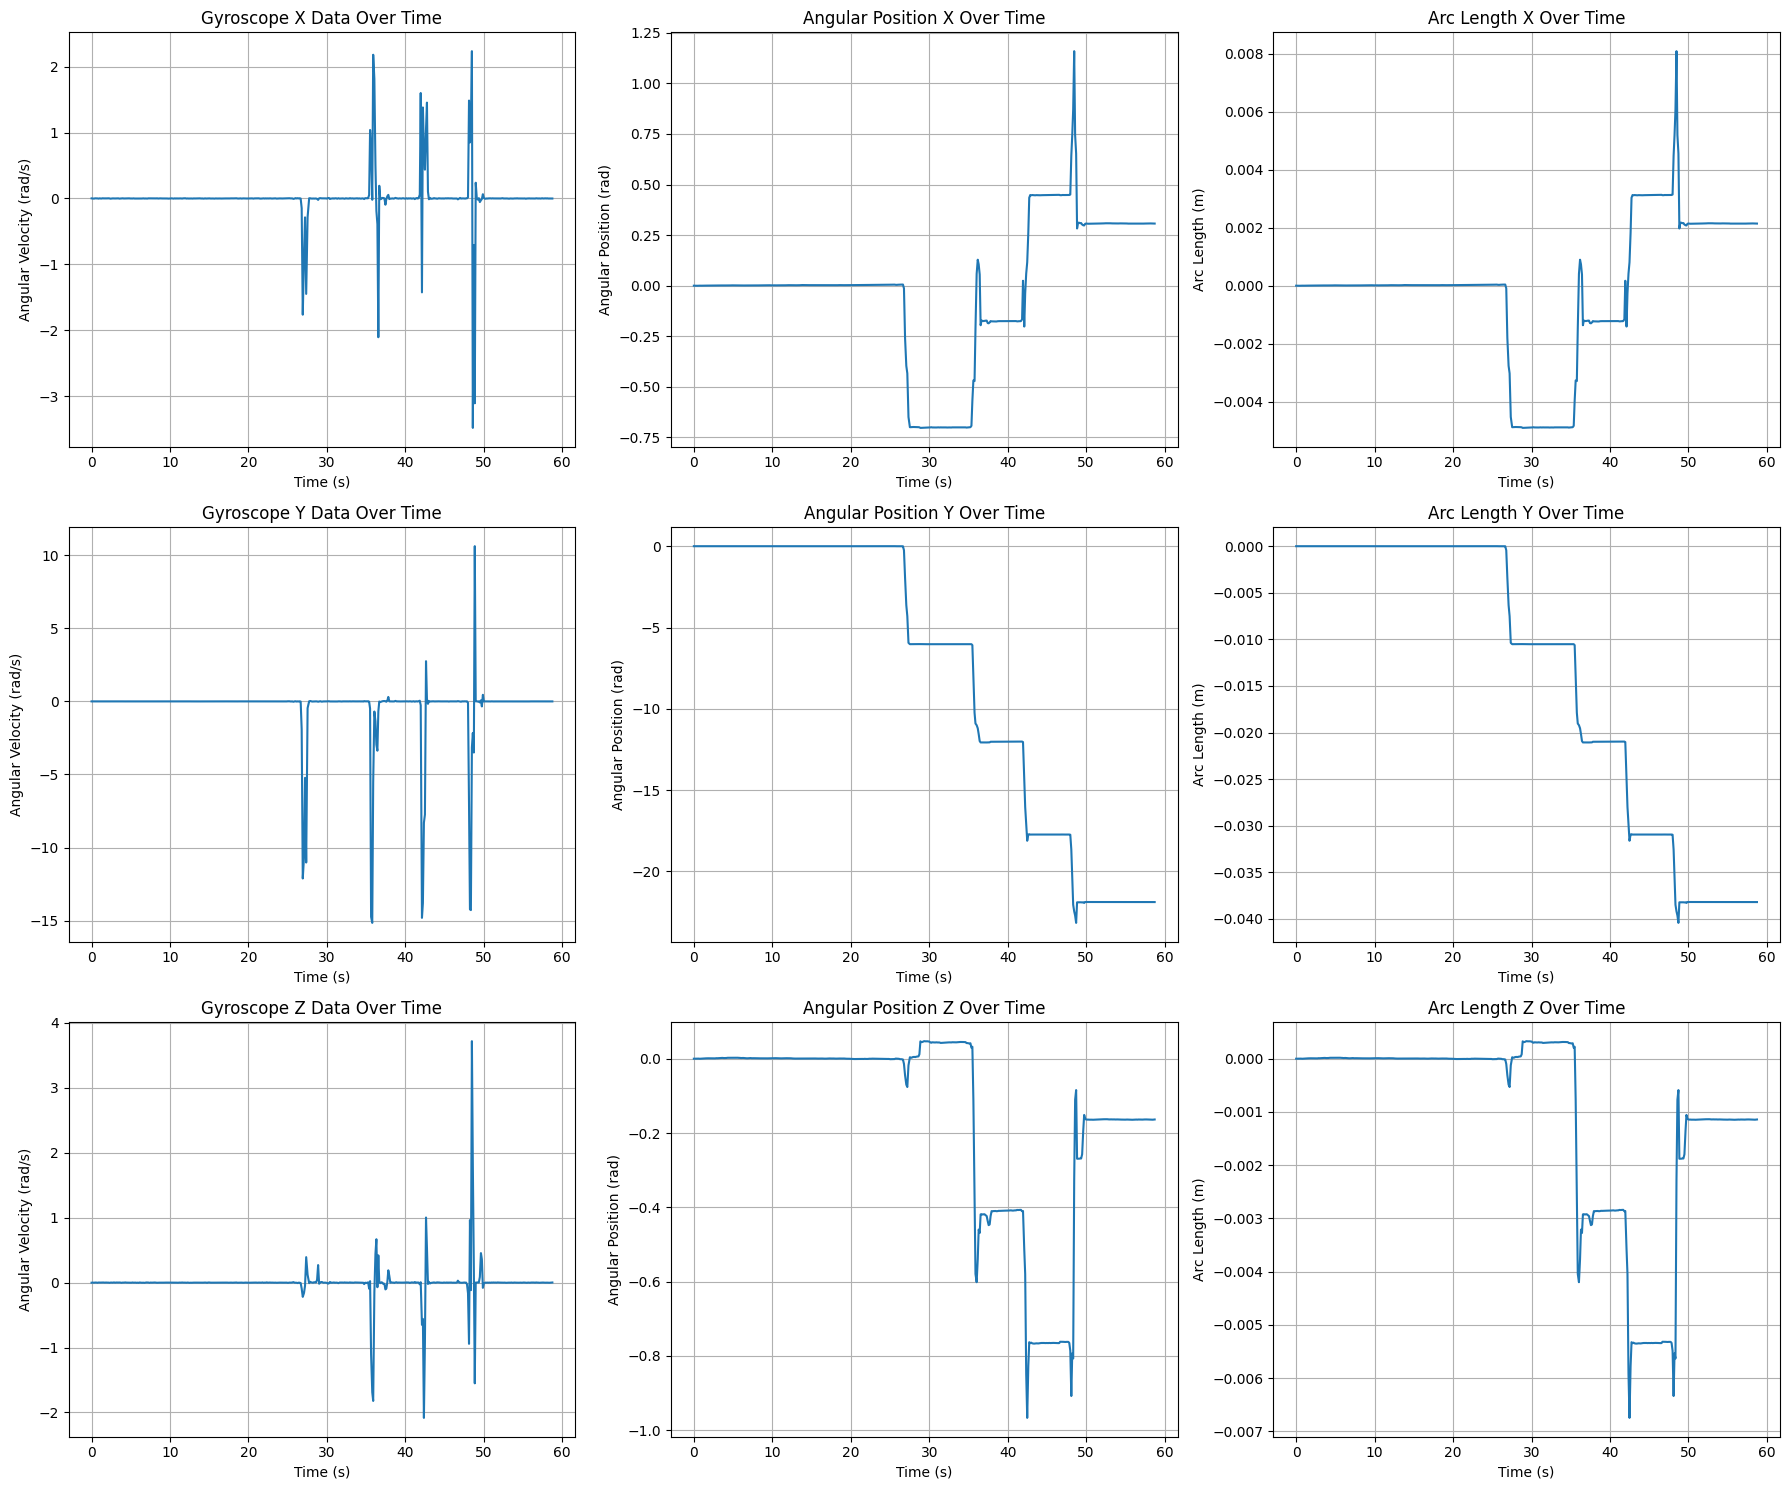

Angular position and arc length calculated successfully for all axes!
Final angular position (X): 0.307029 radians
Final arc length (X): 0.002143 meters
Final angular position (Y): -21.882010 radians
Final arc length (Y): -0.038191 meters
Final angular position (Z): -0.163552 radians
Final arc length (Z): -0.001142 meters


In [23]:
# Calculate angular position from gyroscope data for all axes
df_gyroscope['angular_position_x'] = angular_position_from_angular_velocity(df_gyroscope, 'gyro_time', 'gyro_x')
df_gyroscope['angular_position_y'] = angular_position_from_angular_velocity(df_gyroscope, 'gyro_time', 'gyro_y')
df_gyroscope['angular_position_z'] = angular_position_from_angular_velocity(df_gyroscope, 'gyro_time', 'gyro_z')

# Assume a radius for arc calculation (you can adjust this value as needed)
# Using a typical skateboard wheel radius of approximately 0.03 meters (30mm)
radius_x = 0.4  # meters
radius_y = 0.1  # meters
radius_z = 0.4  # meters

# Calculate arc length from angular position for all axes
df_gyroscope['arc_length_x'] = calculate_arc_from_angular_position(df_gyroscope['angular_position_x'], radius_x)
df_gyroscope['arc_length_y'] = calculate_arc_from_angular_position(df_gyroscope['angular_position_y'], radius_y)
df_gyroscope['arc_length_z'] = calculate_arc_from_angular_position(df_gyroscope['angular_position_z'], radius_z)

# Plot the arc length over time for all axes
plt.figure(figsize=(15, 12))

# Create subplots for better visualization
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# X-axis plots
axes[0, 0].plot(df_gyroscope['gyro_time'], df_gyroscope['gyro_x'])
axes[0, 0].set_title('Gyroscope X Data Over Time')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Angular Velocity (rad/s)')
axes[0, 0].grid(True)

axes[0, 1].plot(df_gyroscope['gyro_time'], df_gyroscope['angular_position_x'])
axes[0, 1].set_title('Angular Position X Over Time')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Angular Position (rad)')
axes[0, 1].grid(True)

axes[0, 2].plot(df_gyroscope['gyro_time'], df_gyroscope['arc_length_x'])
axes[0, 2].set_title('Arc Length X Over Time')
axes[0, 2].set_xlabel('Time (s)')
axes[0, 2].set_ylabel('Arc Length (m)')
axes[0, 2].grid(True)

# Y-axis plots
axes[1, 0].plot(df_gyroscope['gyro_time'], df_gyroscope['gyro_y'])
axes[1, 0].set_title('Gyroscope Y Data Over Time')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Angular Velocity (rad/s)')
axes[1, 0].grid(True)

axes[1, 1].plot(df_gyroscope['gyro_time'], df_gyroscope['angular_position_y'])
axes[1, 1].set_title('Angular Position Y Over Time')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Angular Position (rad)')
axes[1, 1].grid(True)

axes[1, 2].plot(df_gyroscope['gyro_time'], df_gyroscope['arc_length_y'])
axes[1, 2].set_title('Arc Length Y Over Time')
axes[1, 2].set_xlabel('Time (s)')
axes[1, 2].set_ylabel('Arc Length (m)')
axes[1, 2].grid(True)

# Z-axis plots
axes[2, 0].plot(df_gyroscope['gyro_time'], df_gyroscope['gyro_z'])
axes[2, 0].set_title('Gyroscope Z Data Over Time')
axes[2, 0].set_xlabel('Time (s)')
axes[2, 0].set_ylabel('Angular Velocity (rad/s)')
axes[2, 0].grid(True)

axes[2, 1].plot(df_gyroscope['gyro_time'], df_gyroscope['angular_position_z'])
axes[2, 1].set_title('Angular Position Z Over Time')
axes[2, 1].set_xlabel('Time (s)')
axes[2, 1].set_ylabel('Angular Position (rad)')
axes[2, 1].grid(True)

axes[2, 2].plot(df_gyroscope['gyro_time'], df_gyroscope['arc_length_z'])
axes[2, 2].set_title('Arc Length Z Over Time')
axes[2, 2].set_xlabel('Time (s)')
axes[2, 2].set_ylabel('Arc Length (m)')
axes[2, 2].grid(True)

plt.tight_layout()
plt.show()

print("Angular position and arc length calculated successfully for all axes!")
print(f"Final angular position (X): {df_gyroscope['angular_position_x'].iloc[-1]:.6f} radians")
print(f"Final arc length (X): {df_gyroscope['arc_length_x'].iloc[-1]:.6f} meters")
print(f"Final angular position (Y): {df_gyroscope['angular_position_y'].iloc[-1]:.6f} radians")
print(f"Final arc length (Y): {df_gyroscope['arc_length_y'].iloc[-1]:.6f} meters")
print(f"Final angular position (Z): {df_gyroscope['angular_position_z'].iloc[-1]:.6f} radians")
print(f"Final arc length (Z): {df_gyroscope['arc_length_z'].iloc[-1]:.6f} meters")

In [24]:
# Display the updated dataframe with new columns
print("Updated DataFrame with angular position and arc length:")
print(df_gyroscope.head(10))
print("\n" + "="*50)
print("DataFrame info:")
df_gyroscope.info()
print("\n" + "="*50)
print("Statistical summary:")
print(df_gyroscope[['gyro_x', 'angular_position_x', 'arc_length_x']].describe())

Updated DataFrame with angular position and arc length:
                    timestamp    gyro_x    gyro_y    gyro_z  gyro_time  \
0  2025-10-03 13:42:39.971446  0.001374  0.001294 -0.001031   0.000000   
1  2025-10-03 13:42:40.119080 -0.001421 -0.000489  0.000483   0.178745   
2  2025-10-03 13:42:40.252944 -0.002690 -0.001500 -0.001567   0.307839   
3  2025-10-03 13:42:40.375812  0.002056 -0.000242  0.001345   0.436933   
4  2025-10-03 13:42:40.560174  0.001859  0.001094  0.000941   0.615678   
5  2025-10-03 13:42:40.710630  0.000775 -0.000101 -0.002178   0.764633   
6  2025-10-03 13:42:40.833264 -0.002305 -0.000053  0.001520   0.893726   
7  2025-10-03 13:42:40.966412  0.001721  0.000247  0.000726   1.022820   
8  2025-10-03 13:42:41.098080 -0.000338 -0.002512  0.000599   1.151914   
9  2025-10-03 13:42:41.231365 -0.000638 -0.000676  0.002018   1.290937   

         time_only  angular_position_x  angular_position_y  \
0  13:42:39.971446            0.000000            0.000000   
1  13

## Primo Right
*A quarter of rotation to the right*

Cutting the event window from 14:39:14 to 14:39:20

In [25]:
df_gyroscope_primo_R = df_gyroscope[(df_gyroscope['time_only'] >= datetime.strptime('14:39:14', '%H:%M:%S').time()) & (df_gyroscope['time_only'] <= datetime.strptime('14:39:20', '%H:%M:%S').time())]
df_gyroscope_primo_R.reset_index(drop=True, inplace=True)

In [26]:
# Calculate angular position from gyroscope x-axis data
df_gyroscope_primo_R['angular_position_x'] = angular_position_from_angular_velocity(df_gyroscope_primo_R, 'gyro_time', 'gyro_x')

# Assume a radius for arc calculation (you can adjust this value as needed)
# Using a typical skateboard wheel radius of approximately 0.03 meters (30mm)
radius = 0.03  # meters

# Calculate arc length from angular position
df_gyroscope['arc_length_x'] = calculate_arc_from_angular_position(df_gyroscope_primo_R['angular_position_x'], radius)

print("Angular position and arc length calculated successfully!")
print(f"Final angular position: {df_gyroscope_primo_R['angular_position_x'].iloc[-1]:.6f} radians")
print(f"Final arc length: {df_gyroscope_primo_R['arc_length_x'].iloc[-1]:.6f} meters")

Angular position and arc length calculated successfully!


IndexError: single positional indexer is out-of-bounds

<Figure size 1200x800 with 0 Axes>

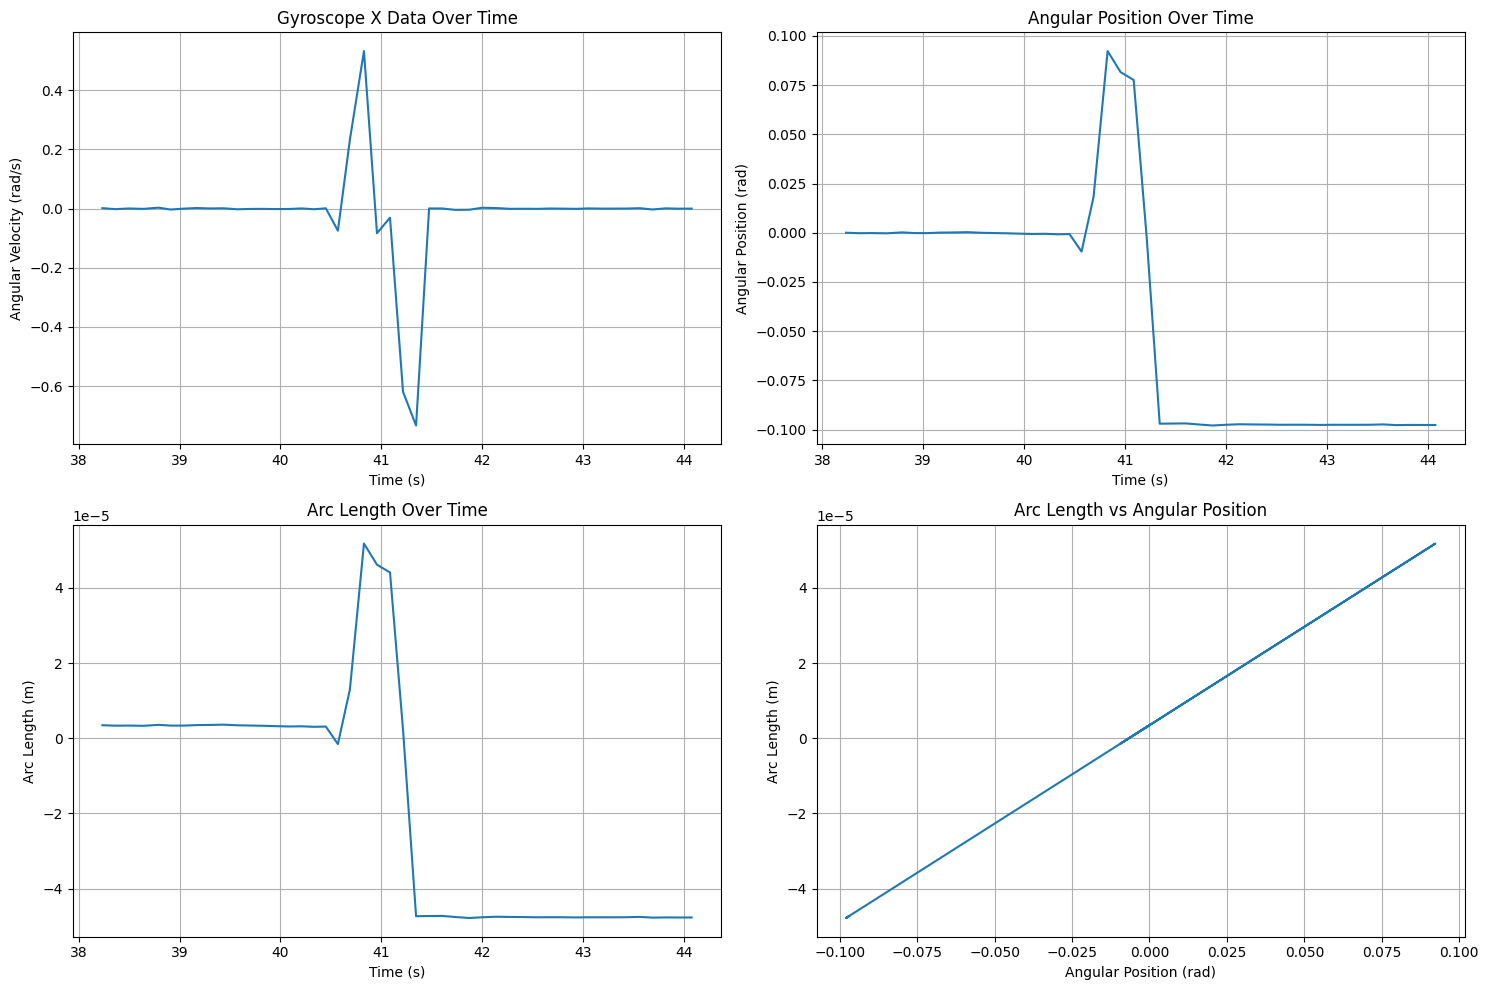

In [ ]:
# Plot the arc length over time
plt.figure(figsize=(12, 8))

# Create subplots for better visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Gyroscope X data over time
axes[0, 0].plot(df_gyroscope_primo_R['gyro_time'], df_gyroscope_primo_R['gyro_x'])
axes[0, 0].set_title('Gyroscope X Data Over Time')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Angular Velocity (rad/s)')
axes[0, 0].grid(True)

# Plot 2: Angular position over time
axes[0, 1].plot(df_gyroscope_primo_R['gyro_time'], df_gyroscope_primo_R['angular_position_x'])
axes[0, 1].set_title('Angular Position Over Time')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Angular Position (rad)')
axes[0, 1].grid(True)

# Plot 3: Arc length over time
axes[1, 0].plot(df_gyroscope_primo_R['gyro_time'], df_gyroscope_primo_R['arc_length_x'])
axes[1, 0].set_title('Arc Length Over Time')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Arc Length (m)')
axes[1, 0].grid(True)

# Plot 4: Arc length vs Angular position
axes[1, 1].plot(df_gyroscope_primo_R['angular_position_x'], df_gyroscope_primo_R['arc_length_x'])
axes[1, 1].set_title('Arc Length vs Angular Position')
axes[1, 1].set_xlabel('Angular Position (rad)')
axes[1, 1].set_ylabel('Arc Length (m)')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
df_gyroscope_primo_R

,timestamp,gyro_x,gyro_y,gyro_z,gyro_time,time_only,angular_position_x,arc_length_x,position_x
0,2025-10-01 14:39:14.112396,0.001610,-0.000420,-0.000007,38.234944,14:39:14.112396,0.000000,0.000003,0.000000
1,2025-10-01 14:39:14.245455,-0.001818,0.000068,-0.000805,38.364083,14:39:14.245455,-0.000235,0.000003,-0.000235
2,2025-10-01 14:39:14.385901,0.000419,0.000568,0.002871,38.493221,14:39:14.385901,-0.000181,0.000003,-0.000181
3,2025-10-01 14:39:14.538594,-0.000806,-0.001723,-0.001213,38.642227,14:39:14.538594,-0.000301,0.000003,-0.000301
4,2025-10-01 14:39:14.669724,0.003212,0.000312,-0.002824,38.791234,14:39:14.669724,0.000178,0.000004,0.000178
5,2025-10-01 14:39:14.796178,-0.003033,-0.001246,-0.001340,38.910439,14:39:14.796178,-0.000184,0.000003,-0.000184
6,2025-10-01 14:39:14.925086,-0.000115,0.001977,-0.000109,39.039578,14:39:14.925086,-0.000199,0.000003,-0.000199
7,2025-10-01 14:39:15.054100,0.001984,-0.001701,-0.000894,39.168717,14:39:15.054100,0.000058,0.000003,0.000058
8,2025-10-01 14:39:15.181642,0.000627,-0.001173,0.000135,39.297856,14:39:15.181642,0.000139,0.000004,0.000139
9,2025-10-01 14:39:15.336185,0.001039,0.001981,0.002109,39.436928,14:39:15.336185,0.000283,0.000004,0.000283
